In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
from tsai.all import *
my_setup()

os              : Linux-6.2.6-76060206-generic-x86_64-with-glibc2.35
python          : 3.9.12
tsai            : 0.3.5
fastai          : 2.7.11
fastcore        : 1.5.28
torch           : 1.12.0
cpu cores       : 8
threads per cpu : 2
RAM             : 14.84 GB
GPU memory      : N/A


In [2]:
dsid = 'NATOPS' # multivariate dataset
X, y, splits = get_UCR_data(dsid, return_split=False)

In [4]:
X.shape

(360, 24, 51)

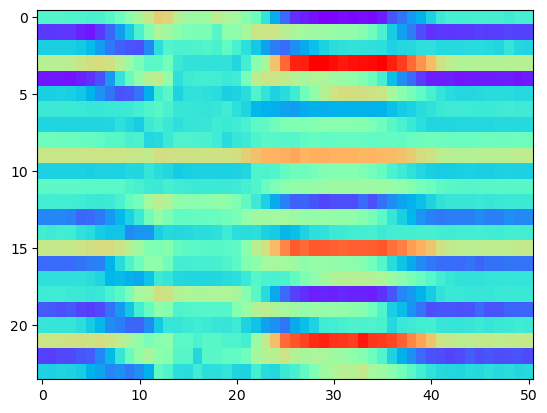

In [8]:
plt.imshow(X[0], cmap='rainbow', aspect='auto')



tfm: TSToPlot - batch shape: torch.Size([64, 3, 224, 224])


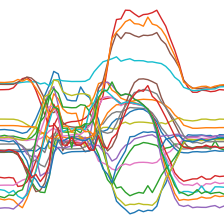



tfm: TSToMat - batch shape: torch.Size([64, 3, 224, 224])


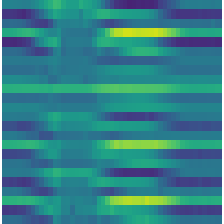



tfm: TSToGADF - batch shape: torch.Size([64, 24, 224, 224])


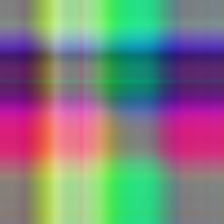



tfm: TSToGASF - batch shape: torch.Size([64, 24, 224, 224])


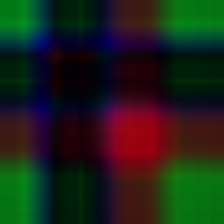



tfm: TSToMTF - batch shape: torch.Size([64, 24, 224, 224])


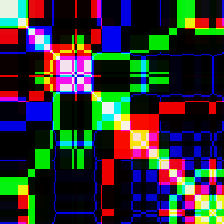



tfm: TSToRP - batch shape: torch.Size([64, 24, 224, 224])


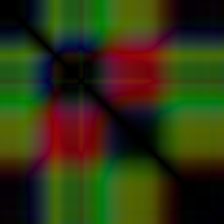

In [9]:
tfms = [None, Categorize()]
bts = [[TSNormalize(), TSToPlot()], 
       [TSNormalize(), TSToMat(cmap='viridis')],
       [TSNormalize(), TSToGADF(cmap='spring')],
       [TSNormalize(), TSToGASF(cmap='summer')],
       [TSNormalize(), TSToMTF(cmap='autumn')],
       [TSNormalize(), TSToRP(cmap='winter')]]
btns = ['Plot', 'Mat', 'GADF', 'GASF', 'MTF', 'RP']
for i, (bt, btn) in enumerate(zip(bts, btns)):
    dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
    dls = TSDataLoaders.from_dsets(dsets.train,
                                   dsets.valid,
                                   bs=[64, 128],
                                   batch_tfms=bt,
                                   shuffle=False)
    xb, yb = dls.train.one_batch()
    print(f'\n\ntfm: TSTo{btn} - batch shape: {xb.shape}')
    xb[0].show()
    plt.show()